# Getting data
 In this section we will get data from text file

# Using command line in notebook
One can check the operating system and run commands from within a notebook.

In [1]:
# You can create directories and remove them
%ls

 Volume in drive C has no label.
 Volume Serial Number is C0B9-E0BE

 Directory of C:\Users\dell

04/12/2020  11:43 PM    <DIR>          .
04/12/2020  11:43 PM    <DIR>          ..
09/30/2019  12:34 PM    <DIR>          .anaconda
04/12/2020  11:43 PM    <DIR>          .conda
04/12/2020  09:37 PM                43 .condarc
09/30/2019  12:35 PM    <DIR>          .continuum
09/21/2019  12:20 PM    <DIR>          .dotnet
04/06/2020  09:02 PM    <DIR>          .ipynb_checkpoints
10/03/2019  04:51 PM    <DIR>          .ipython
10/11/2019  01:33 PM    <DIR>          .jupyter
10/27/2019  02:18 PM    <DIR>          .matplotlib
03/13/2020  02:07 PM    <DIR>          3D Objects
11/06/2019  09:02 PM    <DIR>          Anaconda3
04/12/2020  11:17 PM            40,370 arabic Sentiment Analysis.ipynb
04/09/2020  01:25 AM             5,537 arabicNegative.txt
04/09/2020  01:31 AM             4,279 arabicPositive.txt
04/12/2020  11:43 PM               561 arabicSong.txt
03/13/2020  02:07 PM    <DIR>     


# Opening and Reading a Text File
Once we know where a file is we can open it. Here we will get a text online, copy it and save it as a text file for use.
* Get a song script online
* Create a text file in Jupyter, paste it in, and save it.
* Check if the file is there.
Here is some code to load text.


In [2]:
import matplotlib.pyplot as plt
import nltk
import re

# make sure that graphs are embedded into our notebook output
%matplotlib inline
with open("arabicSong.txt", "r", encoding = "utf-8") as file: # To read Arabic file, we should use the encoding style "utf-8"
    script = file.read()
    
# And we can check what we got.
print(script)

يا من هواه أعزه و أذلني
كيف السبيل الى وصالك دلني
انت الذي حلّفتني وحلفت لي
وحلفت أنك لا تخون فخنتني
وحلفت أنك لا تميل مع الهوى
أين اليمين وأين ما عاهدتني
تركتني حيران صباً هائماً
أرعى النجوم وأنت في عيشٍ هني
لأقعدنّ على الطريق وأشتكي
وأقول مظلوم وأنت ظلمتني
ولأدعونّ عليك في غسق الدجى
يبليك ربي مثلما أبليتني



In [3]:
script # Read the script as a whole (without existing of new line).

'يا من هواه أعزه و أذلني\nكيف السبيل الى وصالك دلني\nانت الذي حلّفتني وحلفت لي\nوحلفت أنك لا تخون فخنتني\nوحلفت أنك لا تميل مع الهوى\nأين اليمين وأين ما عاهدتني\nتركتني حيران صباً هائماً\nأرعى النجوم وأنت في عيشٍ هني\nلأقعدنّ على الطريق وأشتكي\nوأقول مظلوم وأنت ظلمتني\nولأدعونّ عليك في غسق الدجى\nيبليك ربي مثلما أبليتني\n'

# Cleaning the Script

* Splitting the script into words.
* Remove all new lines ("\n", "\r") and stop words. 

 Ps. Before removing the stopwords you need to download them from nltk library.

In [4]:
nltk.download('stopwords') # Download the Arabic Stop Words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
from nltk.tokenize import sent_tokenize, word_tokenize

# We don't need to lower the capital letters because Arabic alphabet doesn't have capital and small letters

script=re.sub(r'\n'," ", script) # Remove all new lines

script=re.sub(r'\d'," ", script) # Remove all numbers

tokensLow = nltk.word_tokenize(script) # Split the script into words.

wordTokensLow = [word for word in tokensLow if word[0].isalpha()] # Check if these words are English words.

stopwords = nltk.corpus.stopwords.words("Arabic") # Get a list of Arabic stop words.

contentWordTokensLow = [word for word in wordTokensLow if word not in stopwords] # Check if the word is not in stop words list

contentWordTokensLow [1:20]# print the result

['أعزه',
 'و',
 'أذلني',
 'السبيل',
 'الى',
 'وصالك',
 'دلني',
 'انت',
 'حلّفتني',
 'وحلفت',
 'وحلفت',
 'أنك',
 'تخون',
 'فخنتني',
 'وحلفت',
 'أنك',
 'تميل',
 'الهوى',
 'اليمين']

# Word Frequencies
Save the results in a Python Dictionary

In [6]:
contentWordTokensLowFreq = nltk.FreqDist(contentWordTokensLow) # Frequency Distribution
contentWordTokensLowFreq

FreqDist({'وحلفت': 3, 'أنك': 2, 'وأنت': 2, 'هواه': 1, 'أعزه': 1, 'و': 1, 'أذلني': 1, 'السبيل': 1, 'الى': 1, 'وصالك': 1, ...})

In [7]:
contentWordTokensLowFreq.tabulate(10) # the top 10 high frequency words

 وحلفت    أنك   وأنت   هواه   أعزه      و  أذلني السبيل    الى  وصالك 
     3      2      2      1      1      1      1      1      1      1 


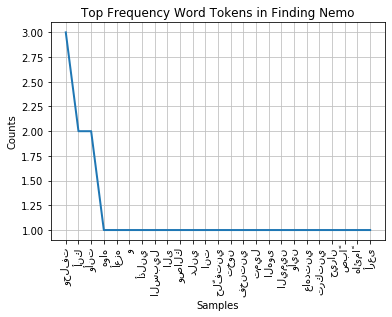

In [8]:
contentWordTokensLowFreq.plot(25, title="Top Frequency Word Tokens in Finding Nemo") # Plotting the top 10 high frequency words

# Sentiment Analysis
* We got one text file of positive words from GitHub.
* We got one text file of negative words from GitHub.
<br> 
We will read them and use them as lists of positive and negative words.

In [9]:
with open("arabicPositive.txt", "r", encoding = "utf-8") as file:
    posText = file.read()

with open("arabicNegative.txt", "r", encoding = "utf-8") as file:
    negText = file.read()

posWords = nltk.word_tokenize(posText.lower())
negWords = nltk.word_tokenize(negText.lower())

print(negWords[1:10])
print(posWords[1:10])

['كره', 'الكره', 'كرهتك', 'اكره', 'أكره', 'أكرهك', 'ضيع', 'أضاع', 'ضيعتني']
['علمتني', 'علم', 'علّم', 'علمت', 'علمتّ', 'علموني', 'صدق', 'صدقت', 'صدّق']


## Calculating associations of words

Now we will create function that counts the number of positive or negative words. The idea is that we pass the function a list of tokens (of the text) and a list of words that have emotions (positive or neagtive words). It counts how many emotion words are in the list of tokens.

In [10]:
# Function that counts how many target words are in a list of tokens
def countSentimentalTokens(listOfTokens,listOfTargetWords):
    numTargetWords = 0
    matchedWords = []
    for token in listOfTokens: # Goes through the tokens in the list
        if token in listOfTargetWords: # For each one it checks if it is in the target list
            numTargetWords += 1
            matchedWords.append(token)
    return numTargetWords, matchedWords # Note that we are returning a tuple (2 values)

thePositive = countSentimentalTokens(contentWordTokensLow,posWords)
print("The number of positive words are " + str(thePositive[0]) + " and the positive words are: \n\n " + str(thePositive[1]))

theNegative = countSentimentalTokens(contentWordTokensLow,negWords)
print("\n\n The number of negativetive words are " + str(theNegative[0]) + " and the negative words are: \n\n " + str(theNegative[1]))

The number of positive words are 8 and the positive words are: 

 ['هواه', 'أعزه', 'وصالك', 'الهوى', 'اليمين', 'أرعى', 'النجوم', 'هني']


 The number of negativetive words are 11 and the negative words are: 

 ['أذلني', 'تخون', 'فخنتني', 'تميل', 'عاهدتني', 'تركتني', 'حيران', 'صباً', 'هائماً', 'يبليك', 'أبليتني']


## Calculating percentage

Now we can calculate the percentages of postive and negative words.

In [11]:
def calculatePercent(listOfTokens,positiveList,negativeList):
    numWords = len(listOfTokens) # How many words total
    
    # We call the function to count the tokens from the positive list in the sentence
    positiveMatches = countSentimentalTokens(listOfTokens,positiveList) 
    percntPos = positiveMatches[0] / numWords # We divide by the total number of words for percentage
    
    # We call the function to count the tokens from the negative list in the sentence
    negativeMatches = countSentimentalTokens(listOfTokens,negativeList)
    percntNeg = negativeMatches[0] / numWords # We divide by the total number of words for percentage

    return percntPos, percntNeg # We return the percentage of positive and negative words

# We test the function on the first sentence
results = calculatePercent(tokensLow,posWords,negWords)
print("Positive: " + "{:.0%}".format(results[0]) + "  Negative: " + "{:.0%}".format(results[1]))

Positive: 15%  Negative: 19%


## Calculate sentiment

Here we calculate whether a sentence is positive or negative.

In [12]:
def calculateSentiment(percntPos,percntNeg):
    sentiment = percntPos - percntNeg # Subtract the percentage of negative words from positive words
    return sentiment

# Test what we get
calculateSentiment(results[0],results[1])
# If the result is 0, then the text is neutral
# If the result is more than 0, then the text is positive
# If the result is less than 0, then the text is negative

-0.033898305084745756